In [9]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [10]:
#topStared=pd.read_csv('data/TopStaredRepositories.csv', sep=",")
#commits=pd.read_csv('data/commitsTopStaredRepositories.csv', sep=",")
react=pd.read_csv('../data/reactSampleCommits.csv', sep=",")

## Data Info

In [11]:
react.head(3)

,pageNum,pageIndex,owner/repo,author,date,additions,deletions,message,numfiles,[files]
0,1,0,facebook/react,gnoff,2023-09-27T23:17:45Z,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js']
1,1,1,facebook/react,gnoff,2023-09-27T17:39:04Z,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js']
2,1,2,facebook/react,gnoff,2023-09-27T17:03:57Z,6733,21,[Flight] Implement `react-server-dom-turbopack...,68,"['.eslintrc.js', 'packages/react-client/src/fo..."


In [12]:
react.shape

(15984, 10)

In [13]:
react.isnull().sum()

pageNum          0
pageIndex        0
owner/repo       0
author        1861
date             0
additions        0
deletions        0
message          0
numfiles         0
[files]          0
dtype: int64

###  Unique data

In [14]:
#'Commits Unique values
unique_value_counts = react.nunique()
# Display the number of unique values for each column
print(unique_value_counts)

pageNum         160
pageIndex       100
owner/repo        1
author         1585
date          15942
additions      1049
deletions       772
message       15774
numfiles        138
[files]        8468
dtype: int64


## Data Cleaning 

In [15]:
react['date'] = pd.to_datetime(react['date'])
react['net_code_change'] = react['additions'] - react['deletions']

# EDA

### React EDA

In [16]:
react.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   pageNum          15984 non-null  int64              
 1   pageIndex        15984 non-null  int64              
 2   owner/repo       15984 non-null  object             
 3   author           14123 non-null  object             
 4   date             15984 non-null  datetime64[ns, UTC]
 5   additions        15984 non-null  int64              
 6   deletions        15984 non-null  int64              
 7   message          15984 non-null  object             
 8   numfiles         15984 non-null  int64              
 9   [files]          15984 non-null  object             
 10  net_code_change  15984 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(6), object(4)
memory usage: 1.3+ MB


In [17]:
top_author = react['author'].value_counts().head(10)
top_author

zpao           1778
gaearon        1667
acdlite        1325
sophiebits     1283
sebmarkbage    1154
jimfb           444
trueadm         436
bvaughn         366
petehunt        331
vjeux           207
Name: author, dtype: int64

In [18]:
top_message = react['message'].value_counts().head(10)
top_message

Record sizes                                     21
Prettier                                         13
Fix typo                                          8
Fix lint                                          8
Update changelog                                  8
Update sizes                                      7
Update complementary-tools.md                     7
Updating dependencies for react-noop-renderer     7
Update README.md                                  6
Update CHANGELOG.md                               6
Name: message, dtype: int64

In [19]:
top_message = react['[files]'].value_counts().head(10)
top_message

['package.json']                                                                                 179
['CHANGELOG.md']                                                                                 164
['docs/docs/tutorial.md']                                                                        155
['README.md']                                                                                    114
['scripts/rollup/results.json']                                                                   56
['docs/docs/05-reusable-components.md']                                                           54
['.circleci/config.yml']                                                                          52
['src/core/ReactCompositeComponent.js', 'src/core/__tests__/ReactCompositeComponent-test.js']     51
['vendor/browser-transforms.js']                                                                  46
['.travis.yml']                                                                            

In [20]:
react['[files]'].nunique()

8468

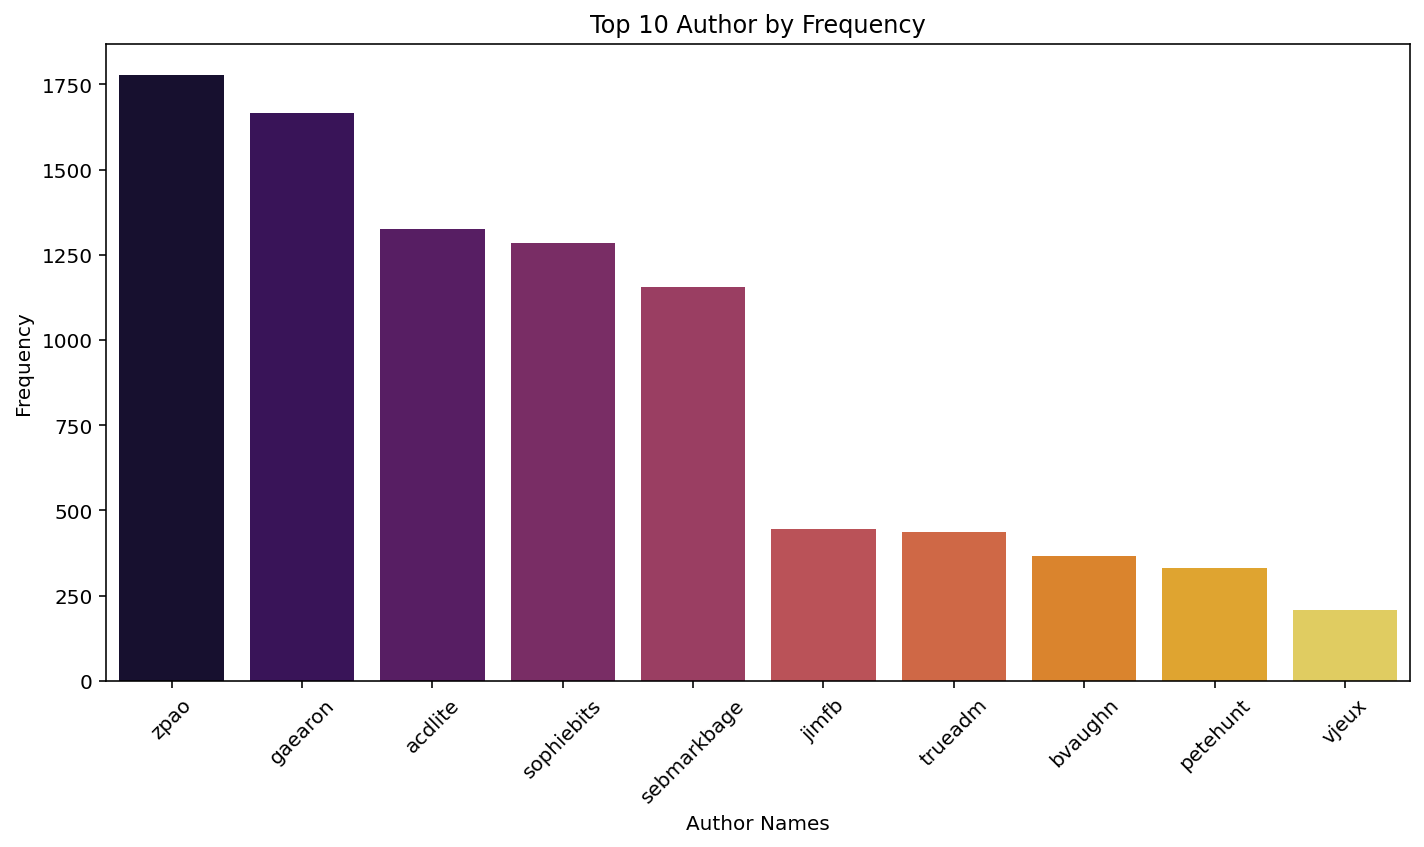

In [21]:
top_10_artists = react['author'].value_counts().head(10).reset_index()
top_10_artists.columns = ['Author', 'Frequency']

plt.figure(figsize=(10, 6))
sns.barplot(x='Author', y='Frequency', data=top_10_artists, palette="inferno")
plt.xticks(rotation=45)
plt.xlabel('Author Names')
plt.ylabel('Frequency')
plt.title('Top 10 Author by Frequency')
plt.tight_layout()
plt.show()


In [22]:
# Dropping columns that could lead to data leakage
df_react= react.drop(columns=['owner/repo','author', 'date', 'message','[files]'])

In [23]:
df_react.head(2)

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
0,1,0,0,1,1,-1
1,1,1,1,0,1,1


In [24]:
df_react.describe()

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
count,15984.00000,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000
mean,80.42042,49.457958,170.243931,101.635073,5.409347,68.608859
std,46.14310,28.850431,1590.465913,1117.465805,17.468773,1752.407619
min,1.00000,0.000000,0.000000,0.000000,0.000000,-63303.000000
25%,40.00000,24.000000,2.000000,1.000000,1.000000,0.000000
50%,80.00000,49.000000,14.000000,4.000000,2.000000,3.000000
75%,120.00000,74.000000,70.000000,25.000000,4.000000,34.000000
max,160.00000,99.000000,68507.000000,63526.000000,300.000000,68507.000000


In [25]:
corr = df_react.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
pageNum,1.000000,-0.002513,-0.032425,-0.030517,-0.090257,-0.009969
pageIndex,-0.002513,1.000000,-0.002635,0.003686,0.009158,-0.004742
additions,-0.032425,-0.002635,1.000000,0.199005,0.427722,0.780689
deletions,-0.030517,0.003686,0.199005,1.000000,0.350799,-0.457060
numfiles,-0.090257,0.009158,0.427722,0.350799,1.000000,0.164500
net_code_change,-0.009969,-0.004742,0.780689,-0.457060,0.164500,1.000000


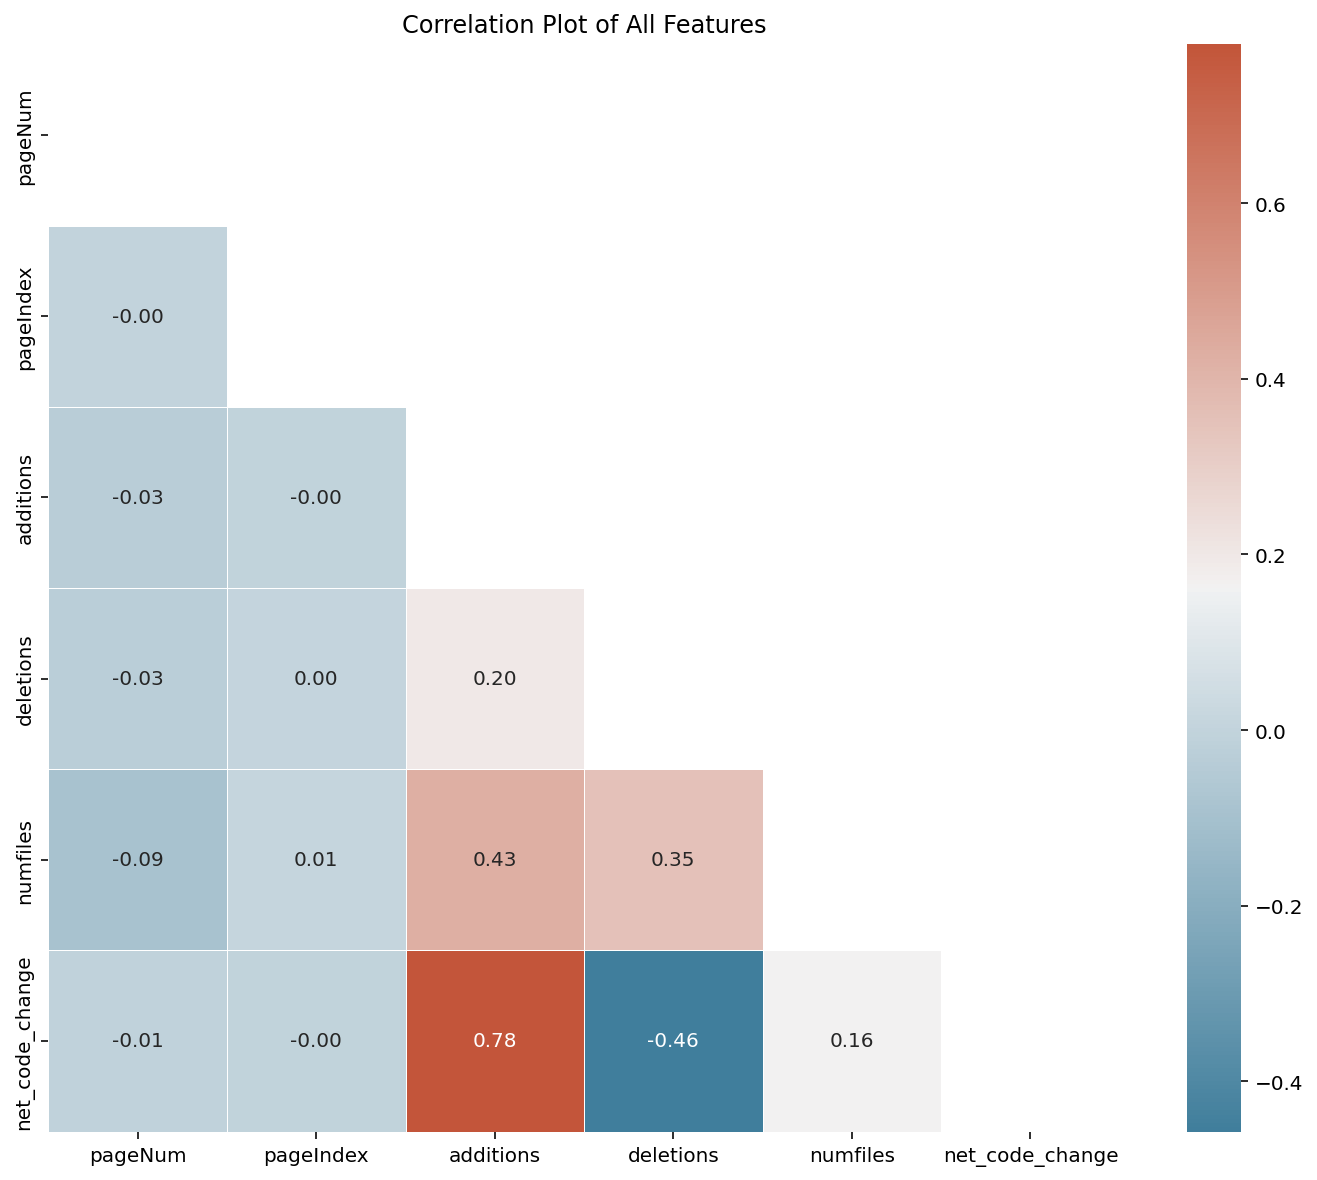

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_react.corr()

plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (otherwise this looks like the square we had above and is redundant)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Plot of All Features')
plt.show()



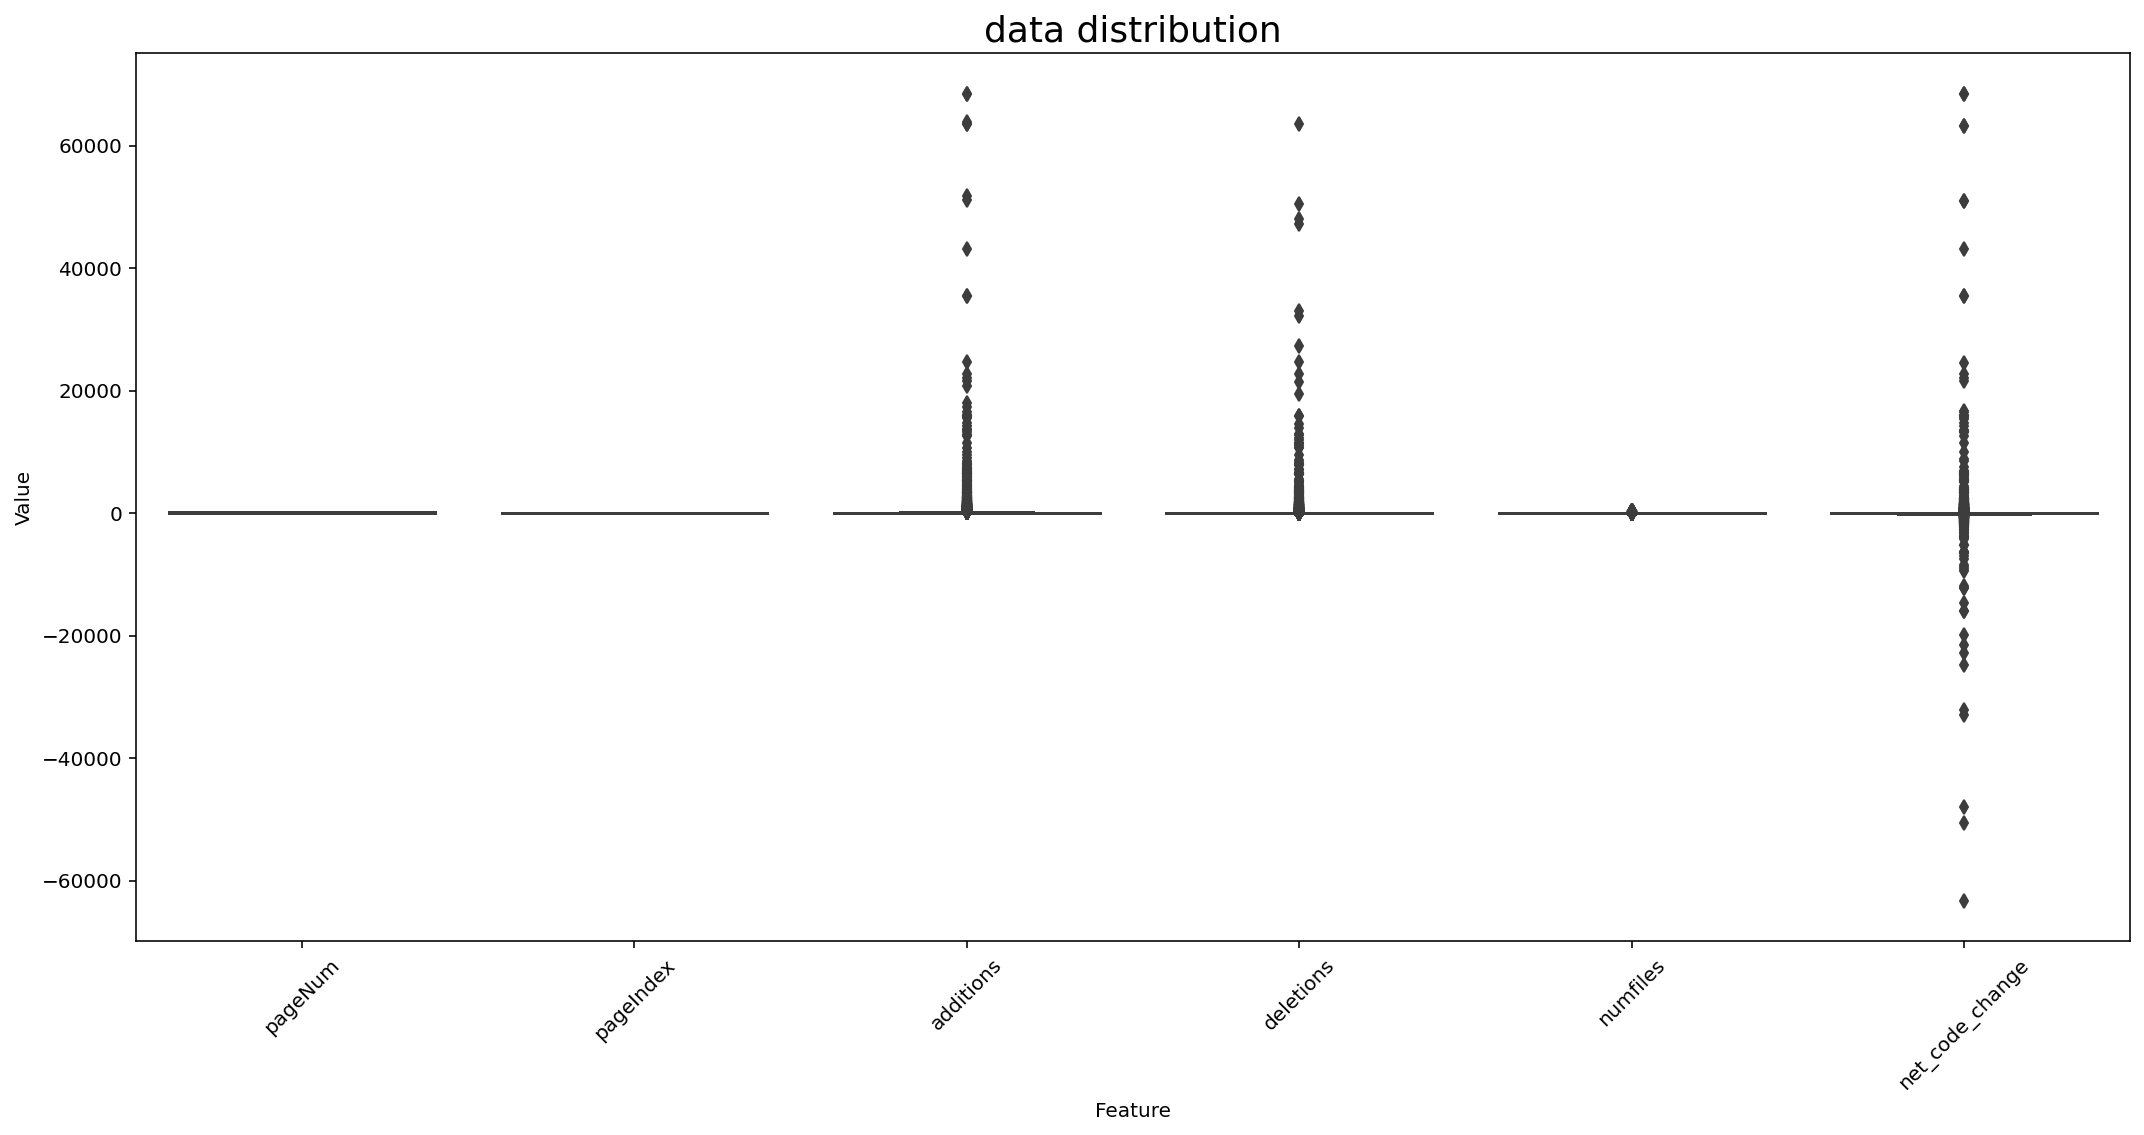

In [27]:
df_num_dis= df_react

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')


plt.figure(figsize=(15, 8)) 
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


{'bodies': [<matplotlib.collections.PolyCollection at 0x263beda1130>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x263beda1250>,
 'cmins': <matplotlib.collections.LineCollection at 0x263bed803a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x263bed80520>}

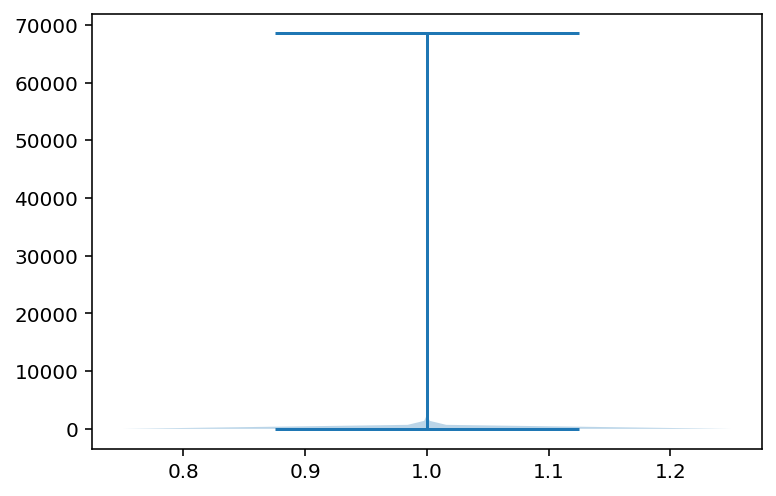

In [28]:
plt.violinplot(df_react['additions'])

In [29]:
df_react.describe()


,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
count,15984.00000,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000
mean,80.42042,49.457958,170.243931,101.635073,5.409347,68.608859
std,46.14310,28.850431,1590.465913,1117.465805,17.468773,1752.407619
min,1.00000,0.000000,0.000000,0.000000,0.000000,-63303.000000
25%,40.00000,24.000000,2.000000,1.000000,1.000000,0.000000
50%,80.00000,49.000000,14.000000,4.000000,2.000000,3.000000
75%,120.00000,74.000000,70.000000,25.000000,4.000000,34.000000
max,160.00000,99.000000,68507.000000,63526.000000,300.000000,68507.000000


#### React - removing Outliers 

In [30]:
df_react.columns

Index(['pageNum', 'pageIndex', 'additions', 'deletions', 'numfiles',
       'net_code_change'],
      dtype='object')

In [31]:
import scipy.stats
import numpy as np



def z_score_removal(df, column, lower_z_score, upper_z_score):
    col_df = df[column]
    
    z_scores = scipy.stats.zscore(col_df)
    outliers = (z_scores > upper_z_score) | (z_scores < lower_z_score)
    return df[~outliers]

def percentile_removal(df, column, lower_bound_perc, upper_bound_perc):
    col_df = df[column]
    
    upper_bound = np.percentile(col_df, upper_bound_perc)
    lower_bound = np.percentile(col_df, lower_bound_perc)
    
    outliers = (col_df > upper_bound) | (col_df < lower_bound)
    return df[~outliers]

filtered_df_zscore= z_score_removal(df_react, 'additions', -1.96, 1.96)
filtered_df_zscore = z_score_removal(filtered_df_zscore, 'deletions', -1.96, 1.96)



filtered_df_percentile = percentile_removal(df_react, 'additions', lower_bound_perc=1, upper_bound_perc=99)
filtered_df_percentile = percentile_removal(filtered_df_percentile, 'deletions', lower_bound_perc=1, upper_bound_perc=99)


In [32]:
filtered_df_percentile.head()

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
0,1,0,0,1,1,-1
1,1,1,1,0,1,1
3,1,3,1021,288,48,733
4,1,4,1710,689,11,1021
5,1,5,380,53,3,327


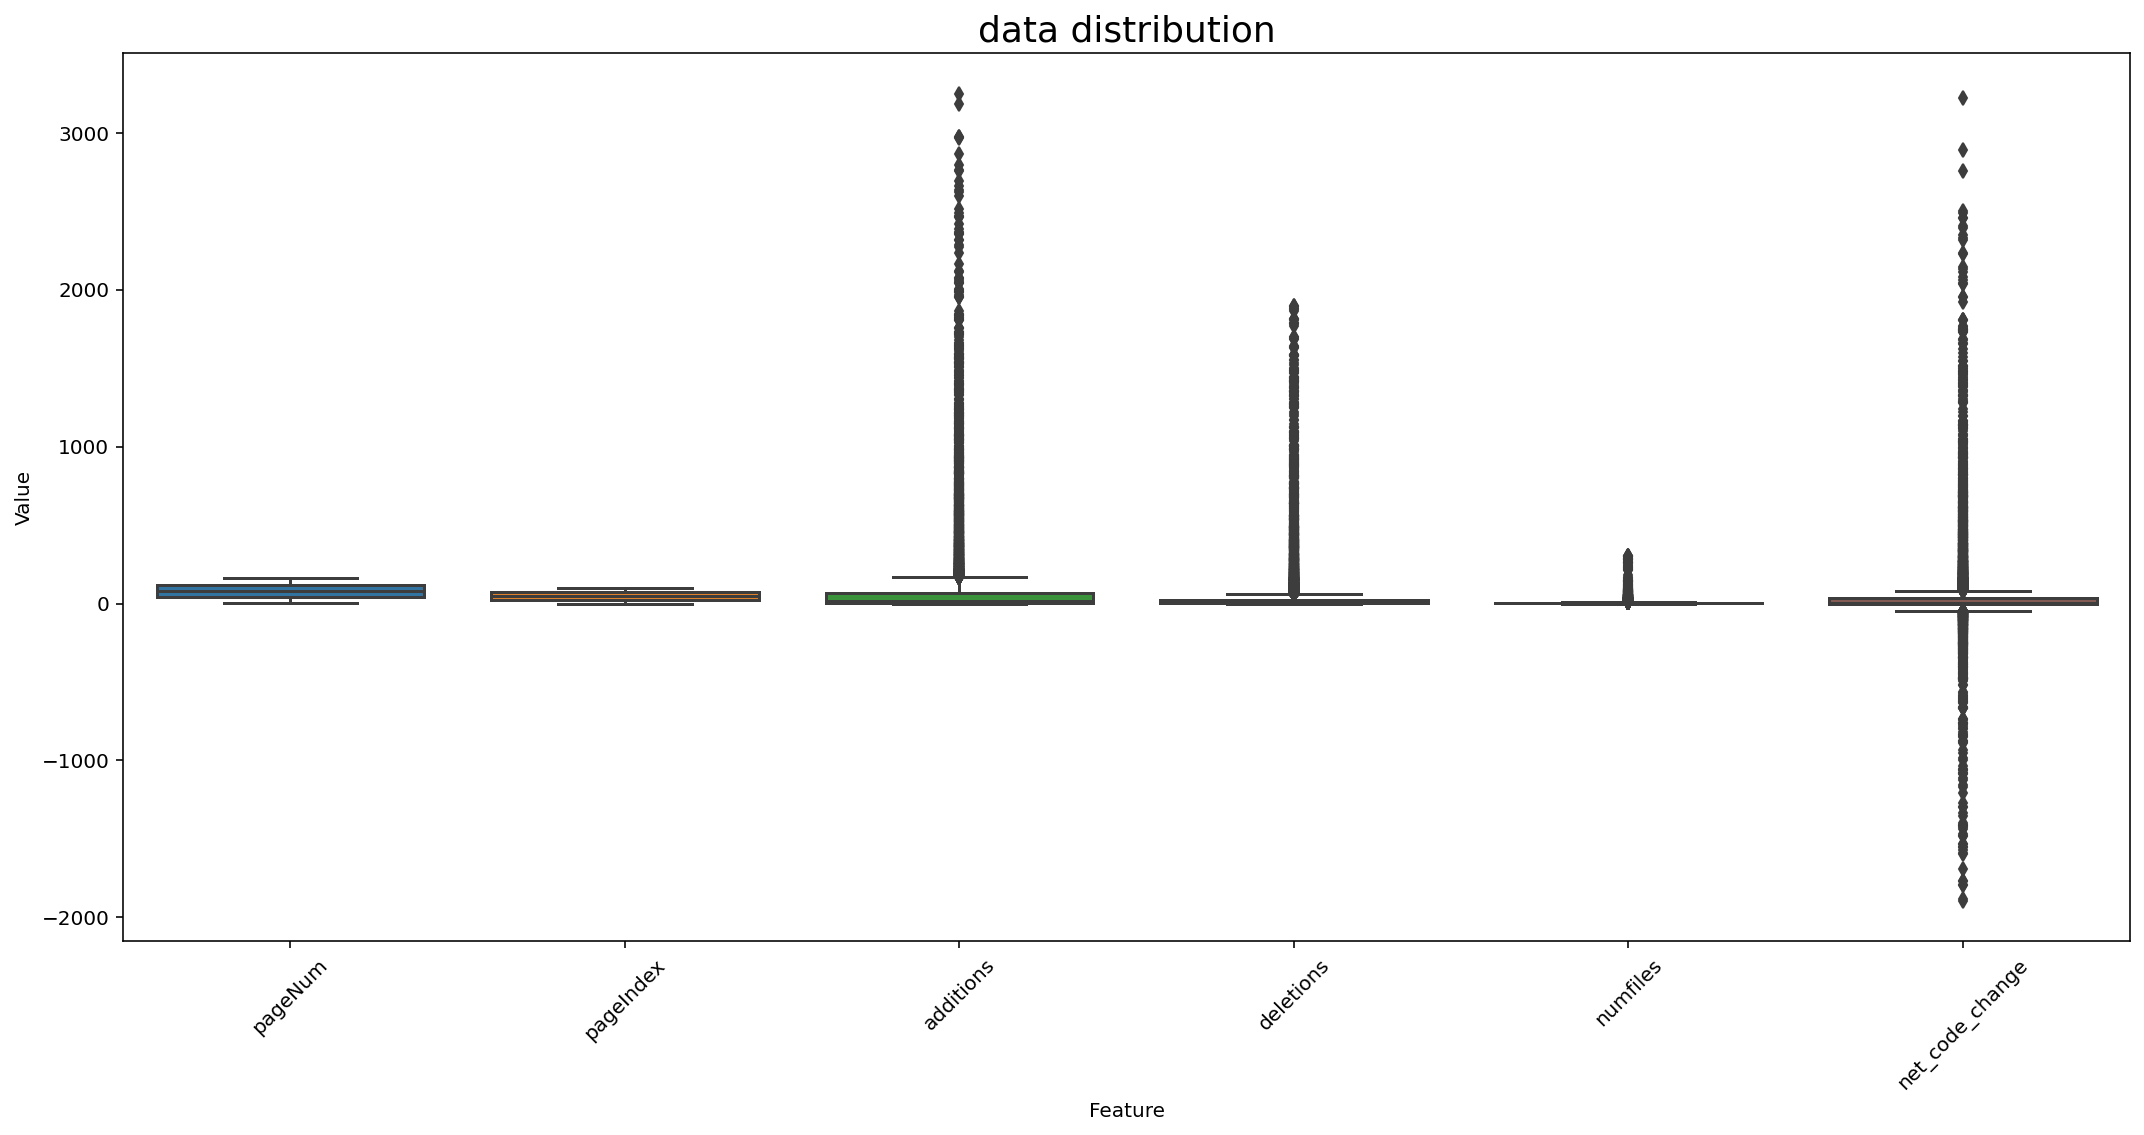

In [33]:
df_num_dis= filtered_df_zscore

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

# Create a single box plot
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


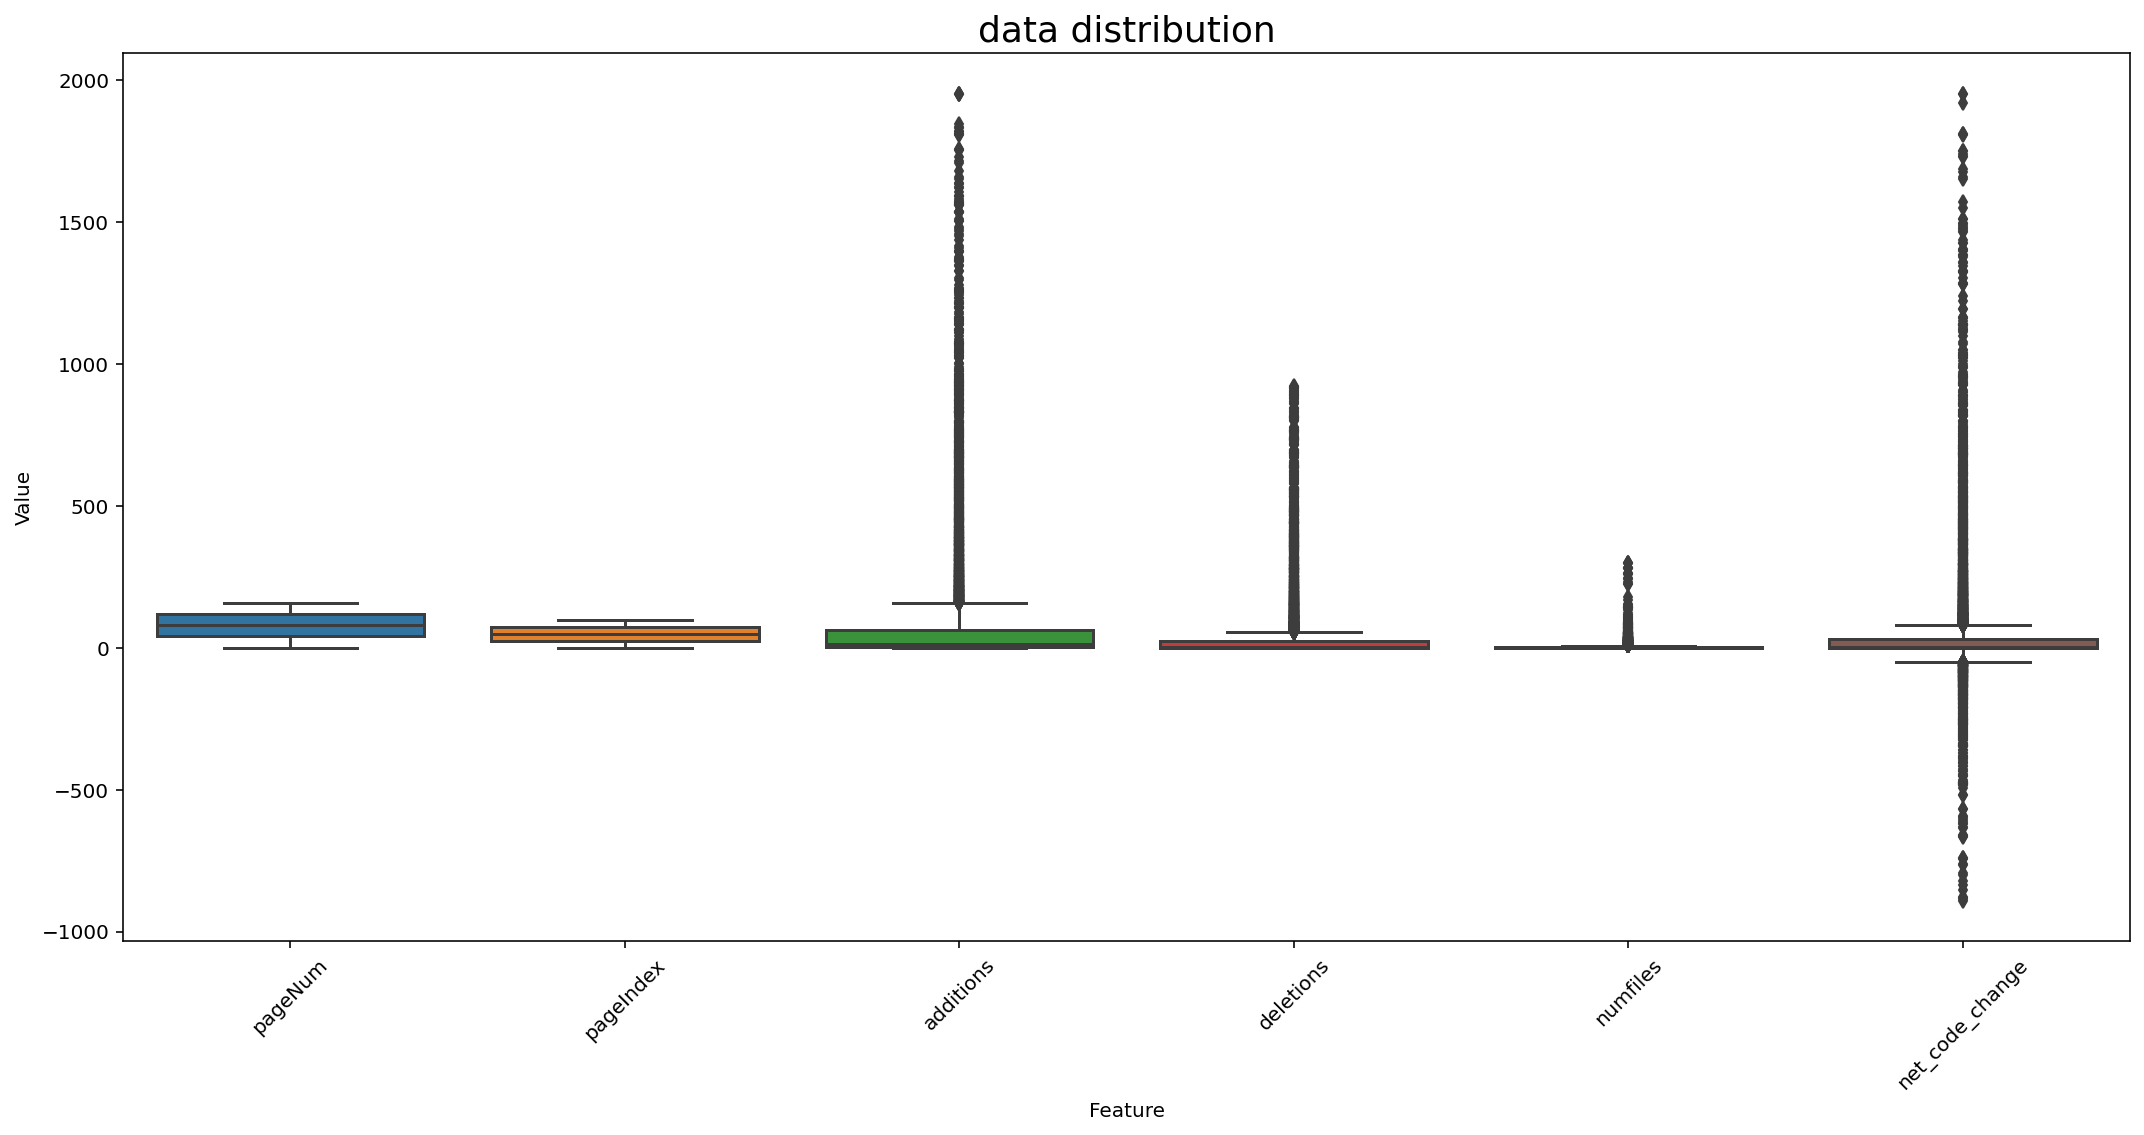

In [34]:
df_num_dis= filtered_df_percentile

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(15, 8))   
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)  
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()

In [35]:
filtered_df_zscore.head()

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change
0,1,0,0,1,1,-1
1,1,1,1,0,1,1
3,1,3,1021,288,48,733
4,1,4,1710,689,11,1021
5,1,5,380,53,3,327


In [36]:
#IsolationForest

In [37]:
from sklearn.ensemble import IsolationForest

features = ['pageNum', 'pageIndex', 'additions', 'deletions', 'numfiles']

 
df = df_react.dropna()

 
X = df[features]
X_train = X[:12000]   
X_test = X[1000:]     

## Fit Model
clf = IsolationForest(n_estimators=50, max_samples=100)
clf.fit(X_train)
 
df['scores'] = clf.decision_function(X)
df['anomaly'] = clf.predict(X)


outliers = df.loc[df['anomaly'] == -1]

outliers

,pageNum,pageIndex,additions,deletions,numfiles,net_code_change,scores,anomaly
0,1,0,0,1,1,-1,-0.013810,-1
1,1,1,1,0,1,1,-0.012564,-1
2,1,2,6733,21,68,6712,-0.240837,-1
3,1,3,1021,288,48,733,-0.181635,-1
4,1,4,1710,689,11,1021,-0.203590,-1
...,...,...,...,...,...,...,...,...
15901,160,1,43,6,6,37,-0.041368,-1
15904,160,4,108,9,6,99,-0.027324,-1
15934,160,34,49,46,3,3,-0.003733,-1
15955,160,55,52,226,5,-174,-0.045603,-1


In [38]:
outliers = outliers.reset_index(drop=True)

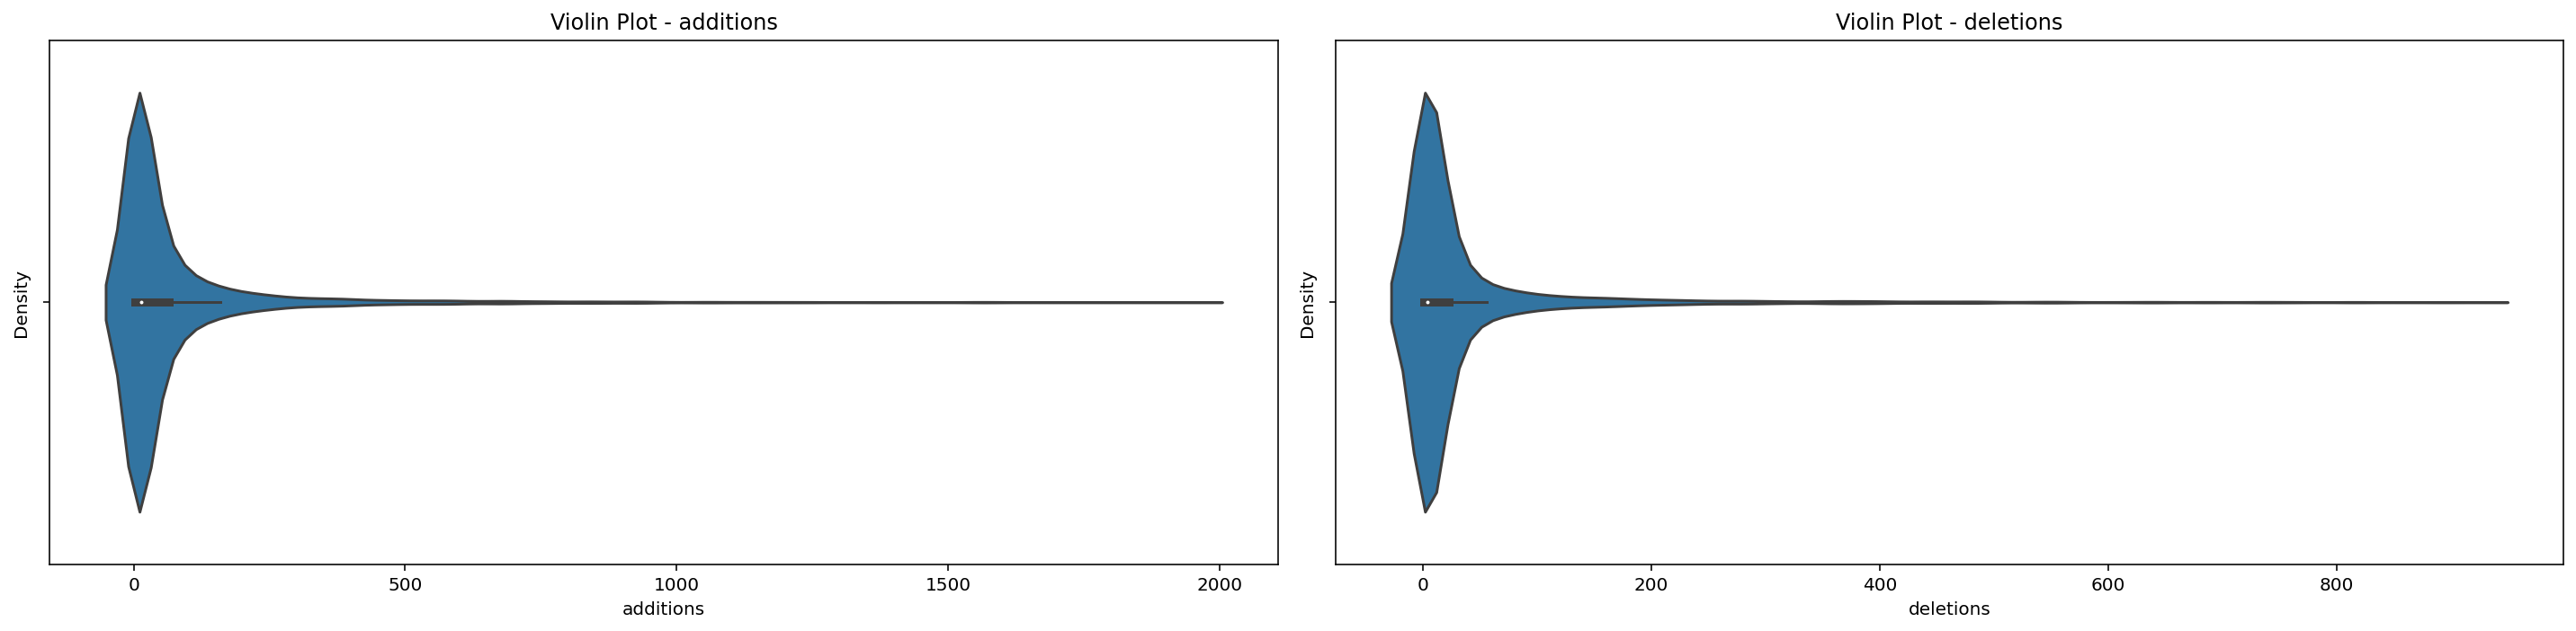

In [39]:
 
fig, axes = plt.subplots(1, 2, figsize=(20, 5))   

# Plot multiple violin plots
sns.violinplot(x=df_num_dis["additions"], ax=axes[0])
axes[0].set_title('Violin Plot - additions')
axes[0].set_xlabel('additions')
axes[0].set_ylabel('Density')

sns.violinplot(x=df_num_dis["deletions"], ax=axes[1])
axes[1].set_title('Violin Plot - deletions')
axes[1].set_xlabel('deletions')
axes[1].set_ylabel('Density')

 
plt.tight_layout()

 
plt.show()

In [40]:
react.head(3)

,pageNum,pageIndex,owner/repo,author,date,additions,deletions,message,numfiles,[files],net_code_change
0,1,0,facebook/react,gnoff,2023-09-27 23:17:45+00:00,0,1,"Revert ""publish `react-server-dom-turbopack` t...",1,['ReactVersions.js'],-1
1,1,1,facebook/react,gnoff,2023-09-27 17:39:04+00:00,1,0,publish `react-server-dom-turbopack` to canary...,1,['ReactVersions.js'],1
2,1,2,facebook/react,gnoff,2023-09-27 17:03:57+00:00,6733,21,[Flight] Implement `react-server-dom-turbopack...,68,"['.eslintrc.js', 'packages/react-client/src/fo...",6712


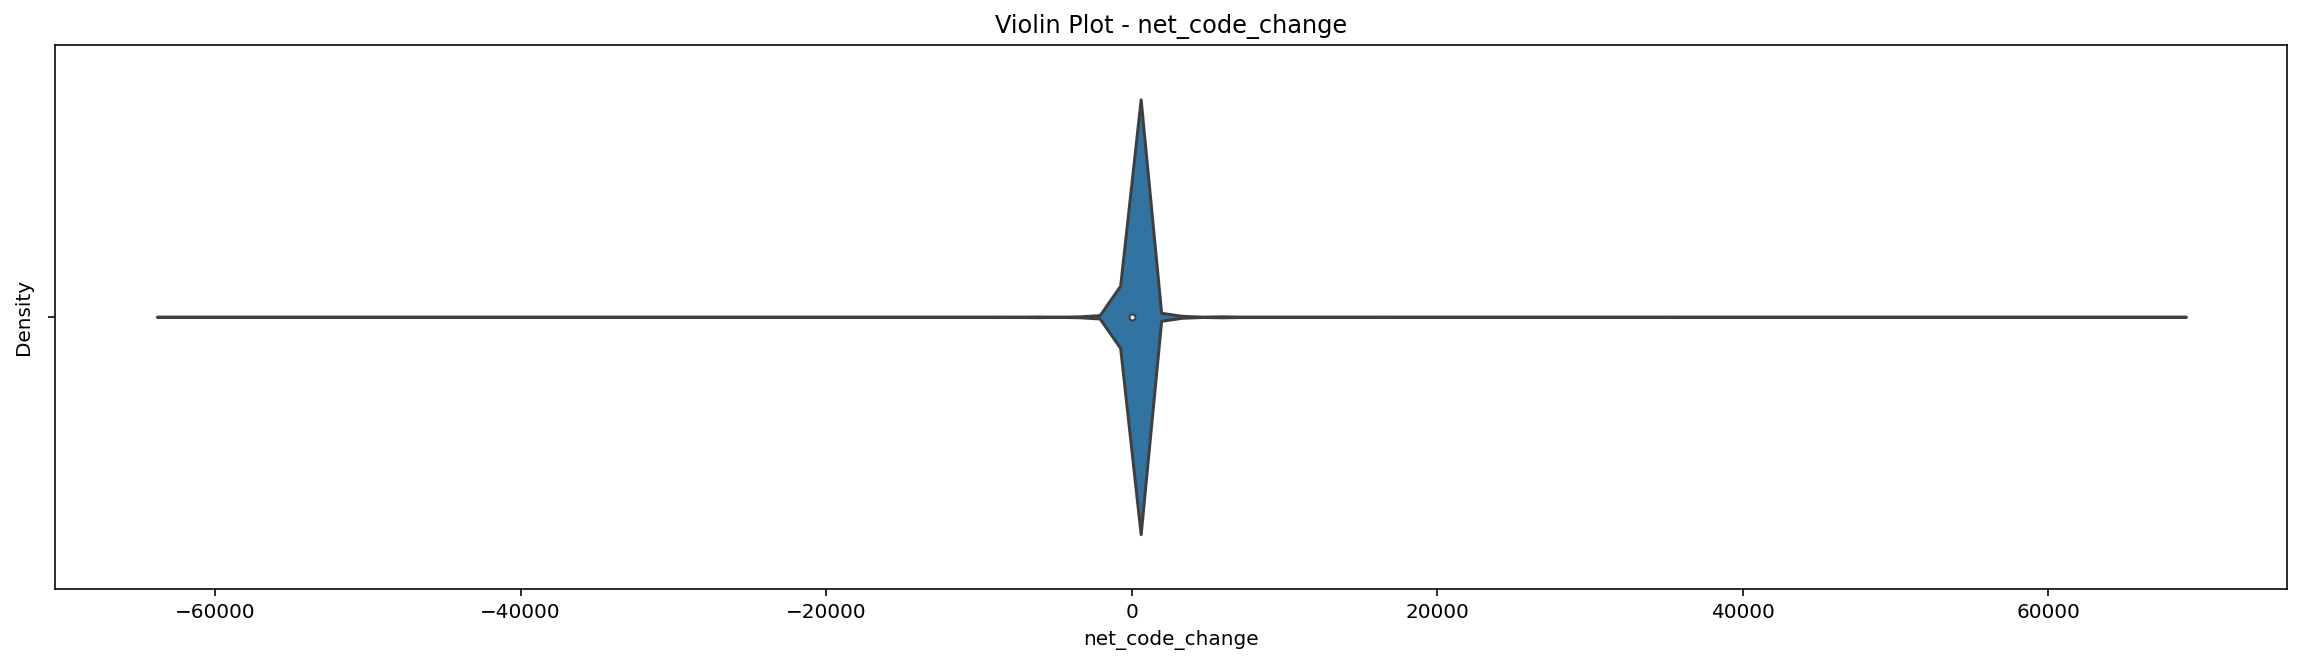

In [41]:
# Create a figure and multiple subplots
fig, axes = plt.subplots(1, 1, figsize=(20, 5))  # Single subplot for a single violin plot

 
sns.violinplot(x=react["net_code_change"], ax=axes)
axes.set_title('Violin Plot - net_code_change')
axes.set_xlabel('net_code_change')
axes.set_ylabel('Density')

 
plt.show()

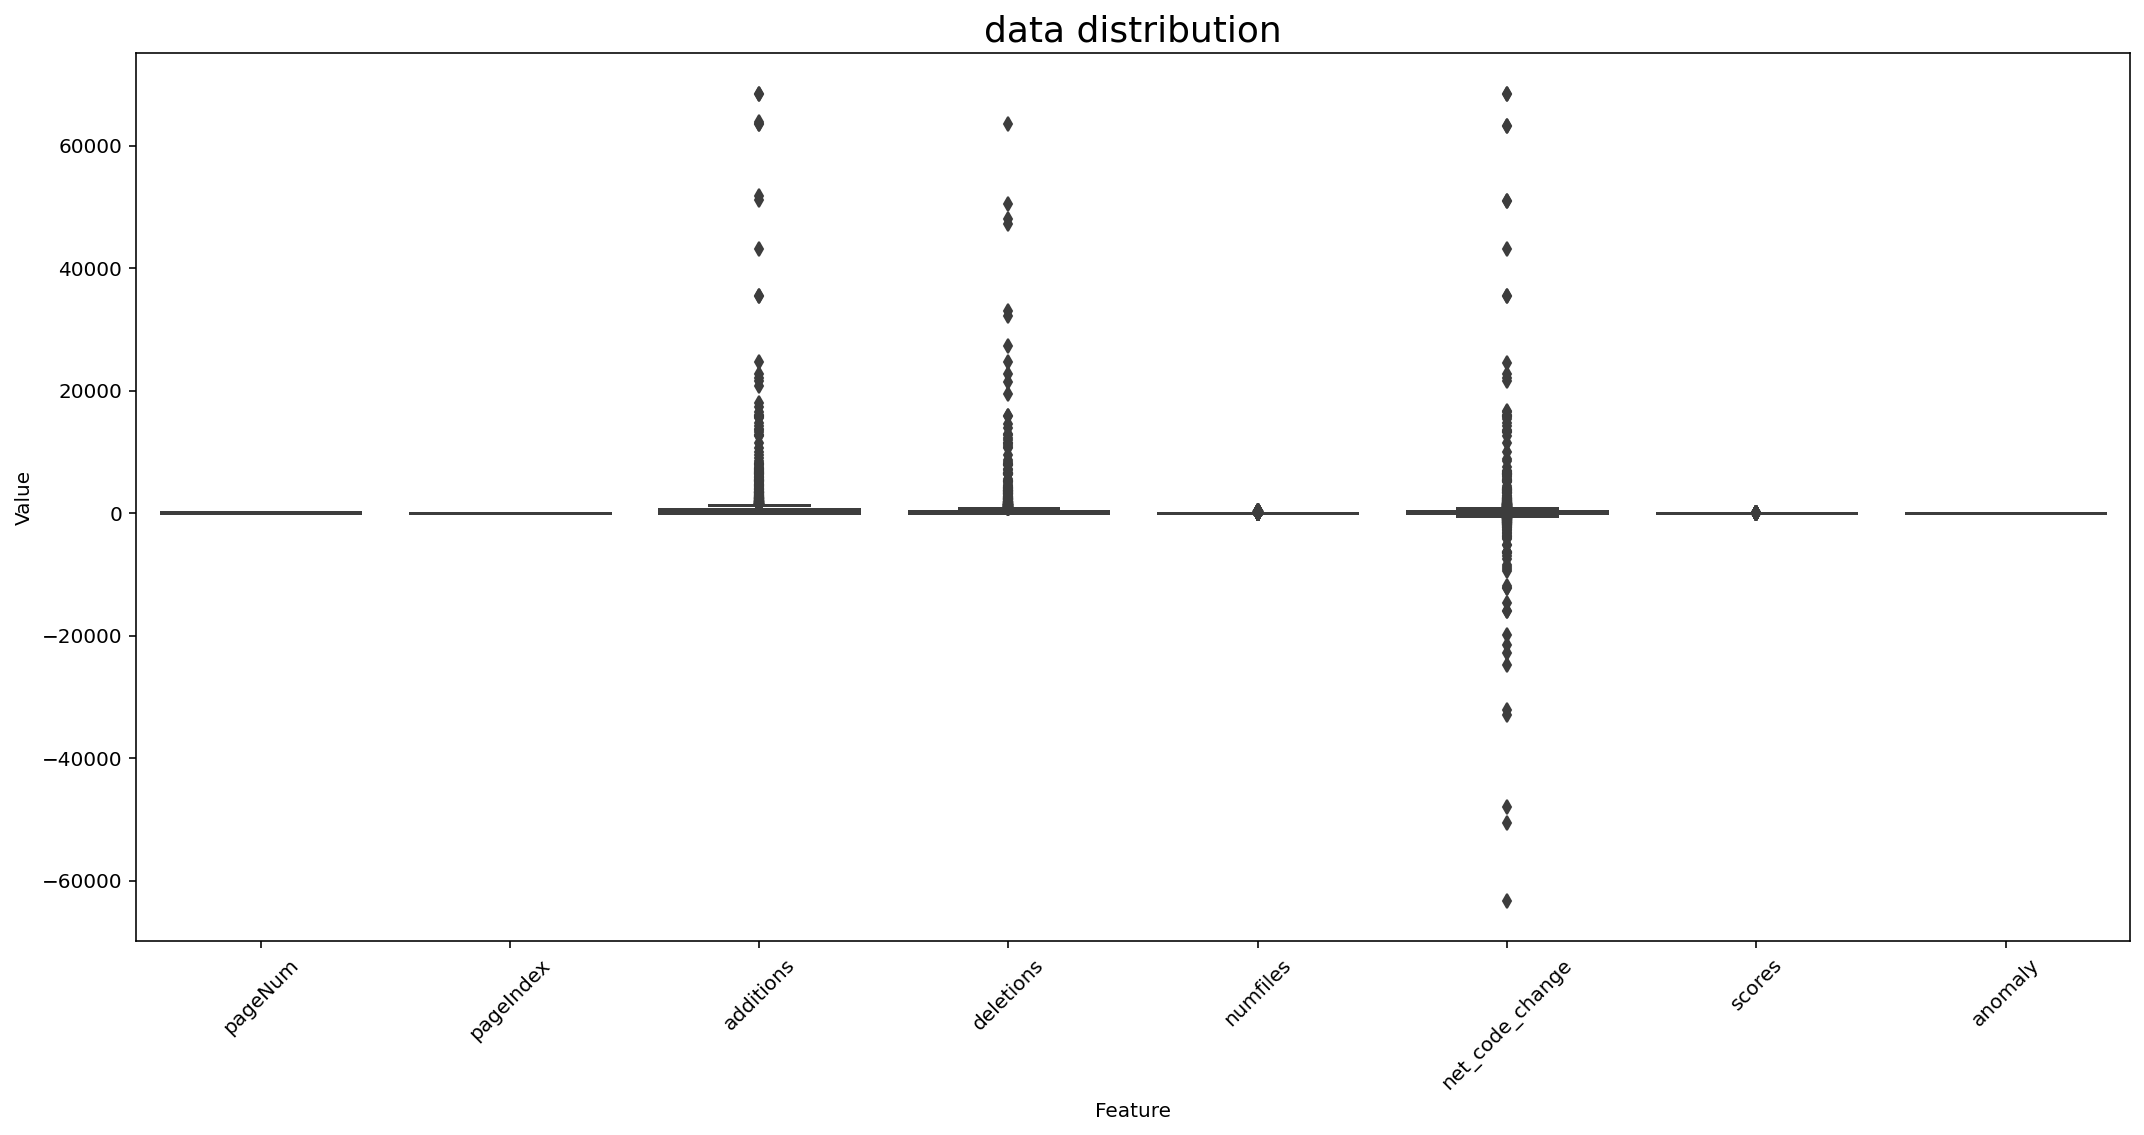

In [42]:
df_num_dis= outliers

# Stacking the data for a single box plot
stacked_data = df_num_dis.melt(var_name='Feature', value_name='Value')

 
plt.figure(figsize=(15, 8))  
sns.boxplot(data=stacked_data, x='Feature', y='Value')
plt.xticks(rotation=45)   
plt.title('data distribution',size=18)
plt.tight_layout()
plt.show()


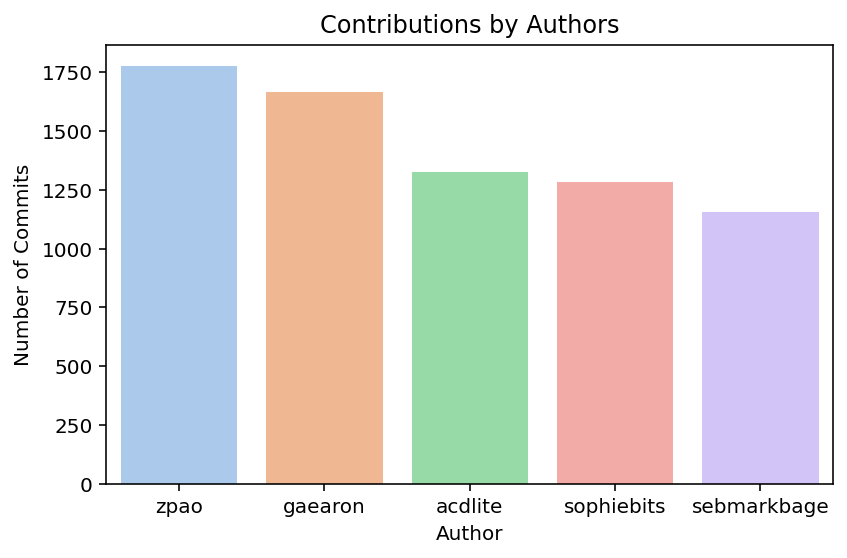

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(x='author', data=react,order=pd.value_counts(react['author']).iloc[:5].index, palette='pastel')
plt.title('Contributions by Authors')
plt.xlabel('Author')
plt.ylabel('Number of Commits')
plt.tight_layout()
plt.show()

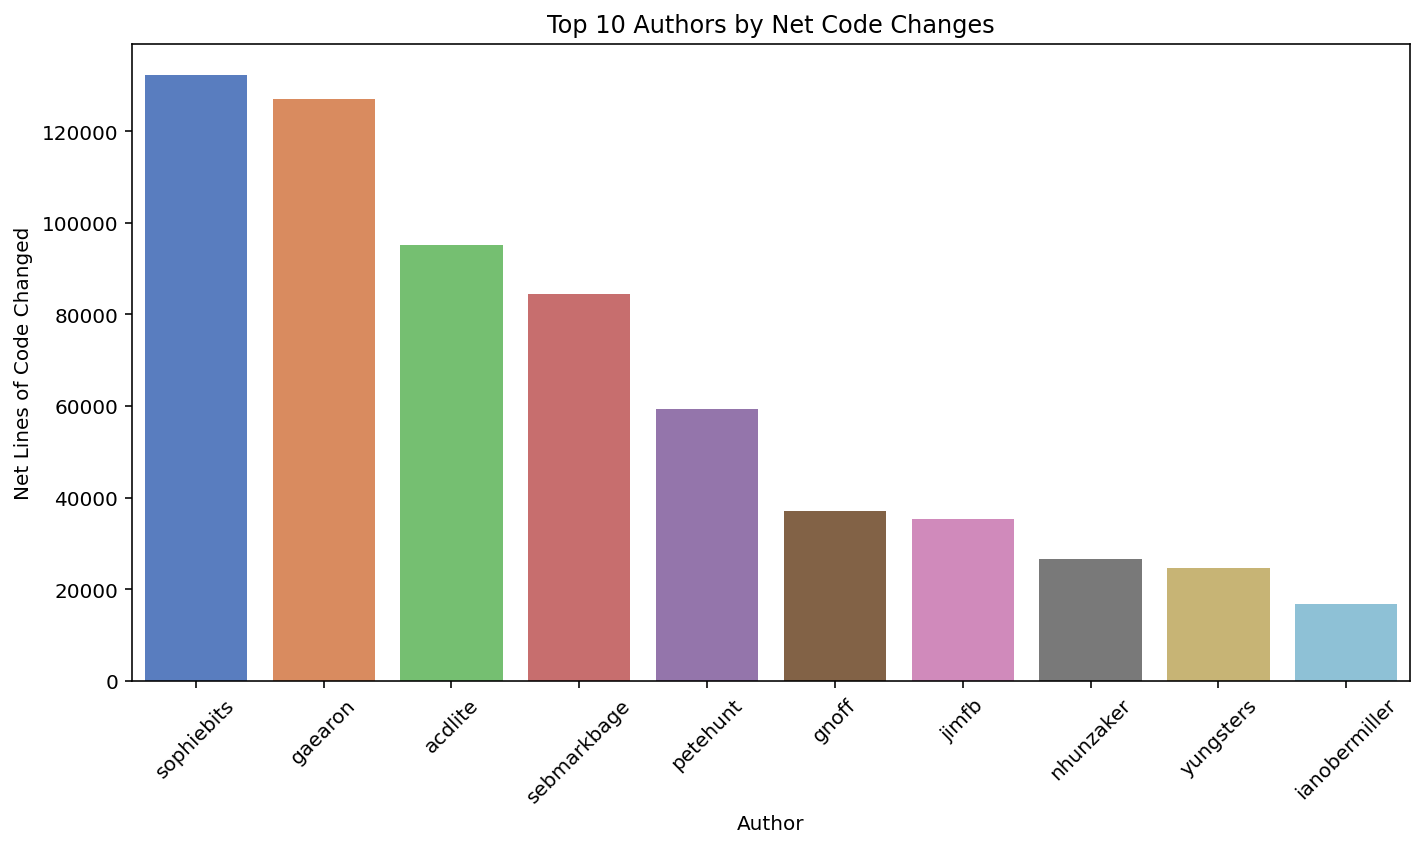

In [44]:
# Group by author and sum up the net code changes
author_net = react.groupby('author')['net_code_change'].sum().reset_index()
author_net = author_net.nlargest(10, 'net_code_change')

 
plt.figure(figsize=(10, 6))
sns.barplot(x='author', y='net_code_change', data=author_net, palette='muted')
plt.title('Top 10 Authors by Net Code Changes')
plt.xlabel('Author')
plt.ylabel('Net Lines of Code Changed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
file_changes = react.groupby('[files]')['net_code_change'].sum().reset_index()
file_changes = file_changes.sort_values(by='net_code_change', ascending=False)
file_changes.head()


,[files],net_code_change
430,"['Gruntfile.js', 'docs/js/JSXTransformer.js', ...",70896
1630,"['extension/.circleci/config.yml', 'extension/...",68507
13,"['.circleci/config.yml', '.eslintignore', '.es...",68507
15,"['.circleci/config.yml', '.eslintignore', '.gi...",63303
596,"['docs/_config.yml', 'docs/_includes/nav_docs....",50929


##### Net Commit Changes Over Time for Top Authors

In [46]:
author_changes = react.groupby(['author', pd.Grouper(key='date', freq='D')])['net_code_change'].sum().reset_index()
#top authors based on total net code change
top_authors = author_changes.groupby('author')['net_code_change'].sum().nlargest(3).index
 
top_author_changes = author_changes[author_changes['author'].isin(top_authors)]
# Pivoting data to have authors as columns
pivot_table = top_author_changes.pivot(index='date', columns='author', values='net_code_change').fillna(0)


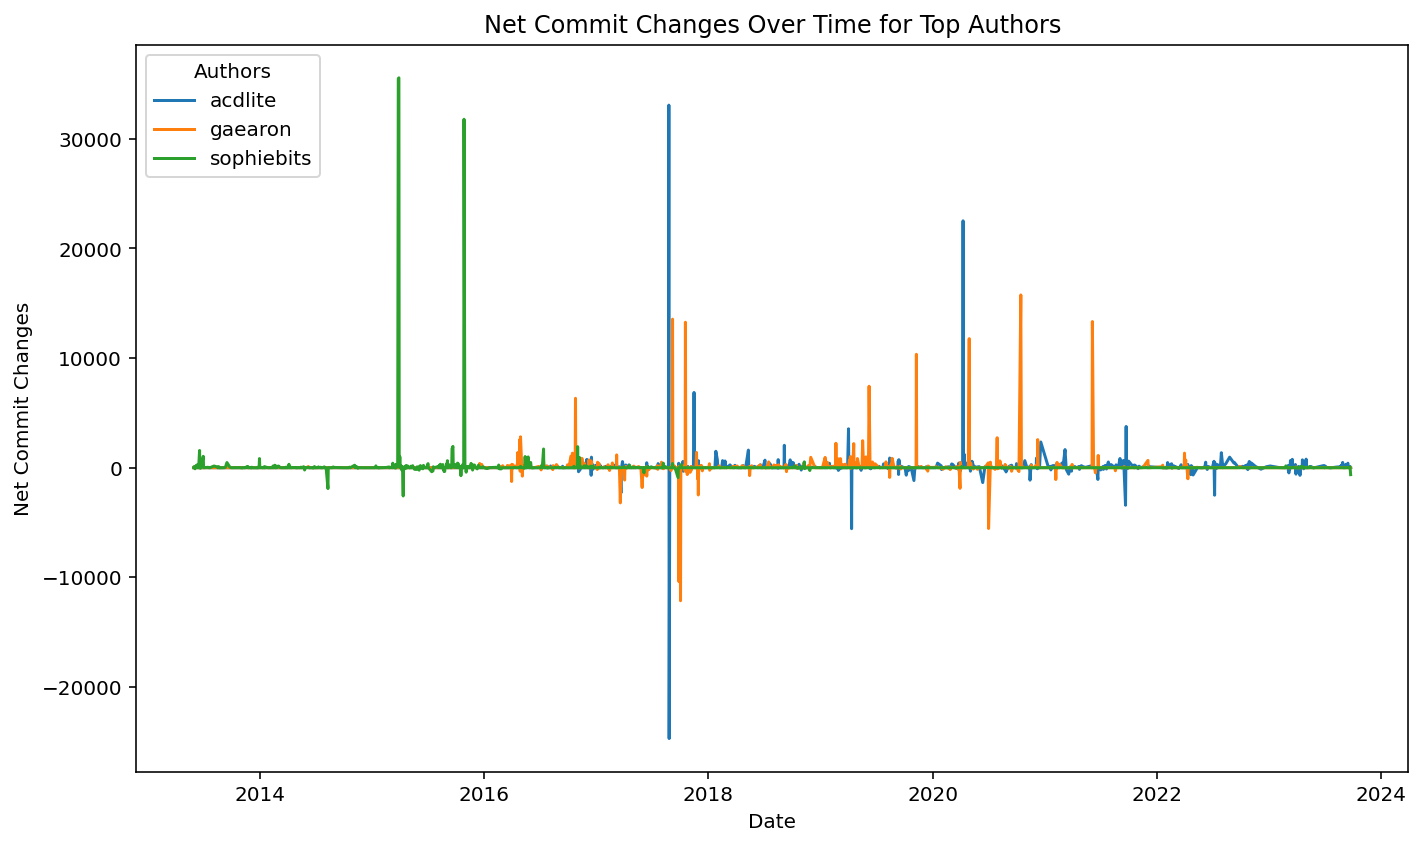

In [55]:
author_changes = react.groupby(['author', pd.Grouper(key='date', freq='D')])['net_code_change'].sum().reset_index()
#top authors based on total net code change
top_authors = author_changes.groupby('author')['net_code_change'].sum().nlargest(3).index
 
top_author_changes = author_changes[author_changes['author'].isin(top_authors)]
 
pivot_table = top_author_changes.pivot(index='date', columns='author', values='net_code_change').fillna(0)

plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, dashes=False)
plt.xlabel('Date')
plt.ylabel('Net Commit Changes')
plt.title('Net Commit Changes Over Time for Top Authors')
plt.legend(title='Authors', loc='upper left')
plt.tight_layout()
plt.show()

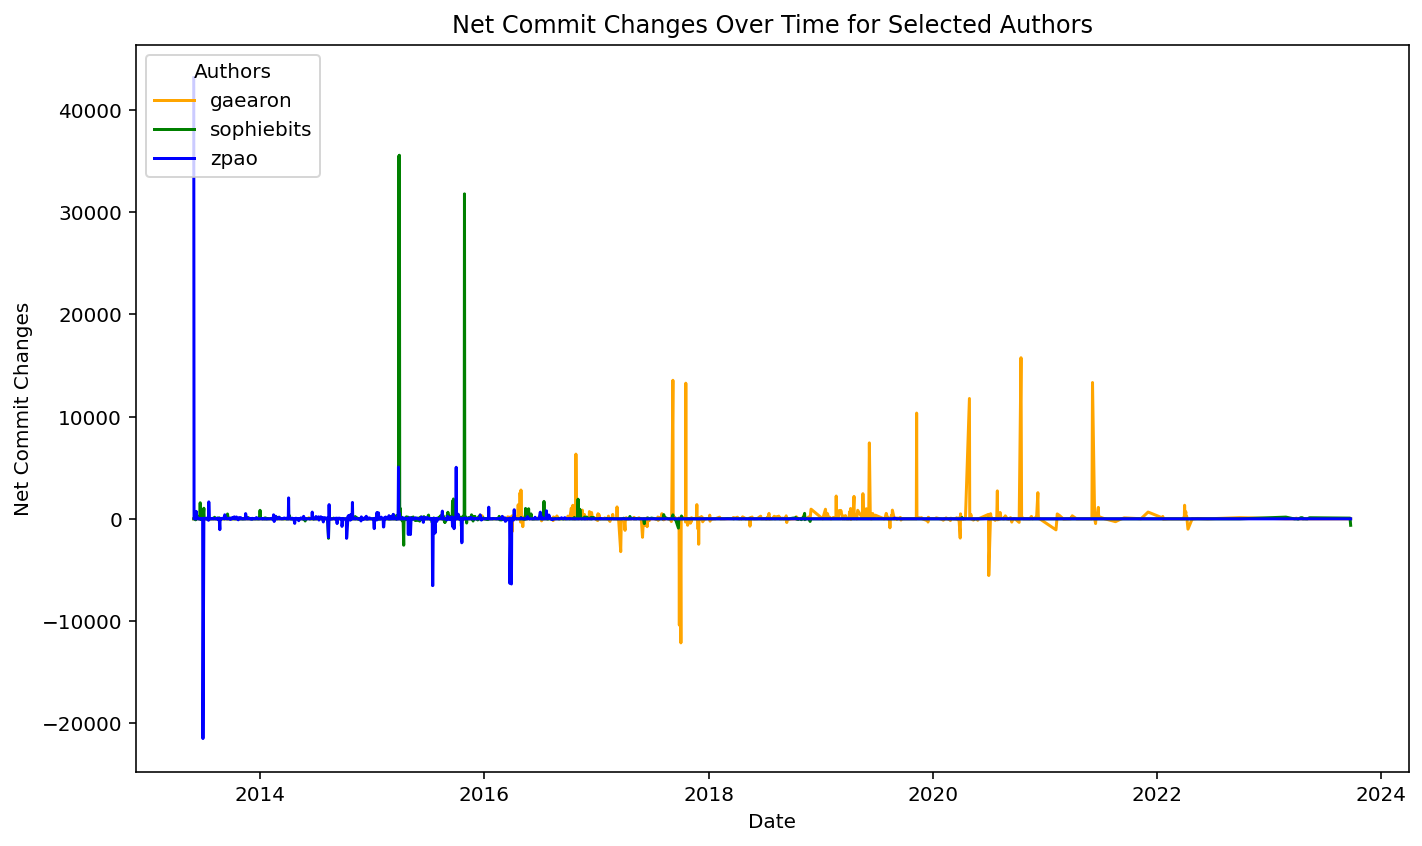

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
author_changes = react.groupby(['author', pd.Grouper(key='date', freq='D')])['net_code_change'].sum().reset_index()

# Define the list of selected authors
selected_authors = ['zpao', 'gaearon', 'sophiebits']

# Filter the data for only the selected authors
selected_author_changes = author_changes[author_changes['author'].isin(selected_authors)]

# Pivoting data to have authors as columns
pivot_table = selected_author_changes.pivot(index='date', columns='author', values='net_code_change').fillna(0)

 
author_colors = {'zpao': 'blue', 'gaearon': 'orange', 'sophiebits': 'green'}
 
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, palette=author_colors, dashes=False)
plt.xlabel('Date')
plt.ylabel('Net Commit Changes')
plt.title('Net Commit Changes Over Time for Selected Authors')
plt.legend(title='Authors', loc='upper left')
plt.tight_layout()
plt.show()


## topStared

In [67]:
topStared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Username          980 non-null    object             
 1   Repository Name   980 non-null    object             
 2   Description       977 non-null    object             
 3   Last Update Date  980 non-null    datetime64[ns, UTC]
 4   Language          877 non-null    object             
 5   Number of Stars   980 non-null    float64            
 6   Tags              489 non-null    object             
 7   Url               980 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 61.4+ KB


In [50]:
top_message = topStared['Username'].value_counts().head(10)
top_message

Username
facebook        20
google          20
angular          7
Microsoft        5
sindresorhus     5
airbnb           5
thoughtbot       4
hashicorp        4
ReactiveX        4
square           4
Name: count, dtype: int64

In [51]:
unique_value_counts = topStared.nunique()
 
print(unique_value_counts)

Username            814
Repository Name     973
Description         972
Last Update Date    978
Language             39
Number of Stars     215
Tags                486
Url                 979
dtype: int64


In [52]:
print("\nSummary Statistics:")
topStared.describe()


Summary Statistics:


,Number of Stars
count,980.000000
mean,12985.714286
std,12780.091770
min,6400.000000
25%,7700.000000
50%,9500.000000
75%,14200.000000
max,290000.000000
